In [1]:
from keras.datasets import mnist

# MNISTデータのロード
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


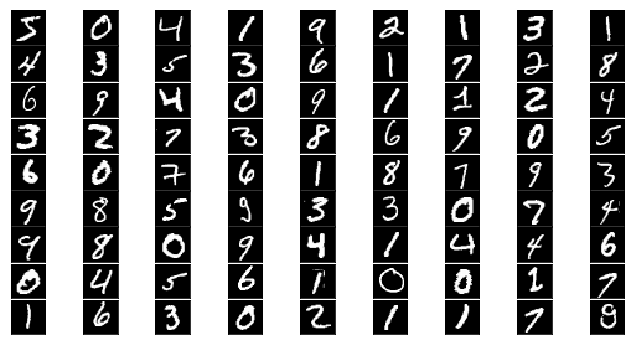

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [3]:
from keras.utils import np_utils
nb_classes = 10

# 画像を1次元配列化
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 画素を0.0-1.0の範囲に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-encoding
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

(60000, 'train samples')
(10000, 'test samples')


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()

#最初の層では入力の形(今回は,784)を指定する．以降の層では不要
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [6]:
batch_size = 128
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_split=0.1,
                            verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s - loss: 2.3031 - acc: 0.1139 - val_loss: 2.2967 - val_acc: 0.1592
Epoch 2/20
54000/54000 [==============================] - 1s - loss: 2.2950 - acc: 0.1228 - val_loss: 2.2914 - val_acc: 0.1835
Epoch 3/20
54000/54000 [==============================] - 1s - loss: 2.2898 - acc: 0.1361 - val_loss: 2.2868 - val_acc: 0.1050
Epoch 4/20
54000/54000 [==============================] - 1s - loss: 2.2840 - acc: 0.1503 - val_loss: 2.2810 - val_acc: 0.1050
Epoch 5/20
54000/54000 [==============================] - 1s - loss: 2.2764 - acc: 0.1670 - val_loss: 2.2745 - val_acc: 0.1797
Epoch 6/20
54000/54000 [==============================] - 1s - loss: 2.2685 - acc: 0.1878 - val_loss: 2.2607 - val_acc: 0.1738
Epoch 7/20
54000/54000 [==============================] - 1s - loss: 2.2588 - acc: 0.2214 - val_loss: 2.2510 - val_acc: 0.2493
Epoch 8/20
54000/54000 [==============================] - 1s -

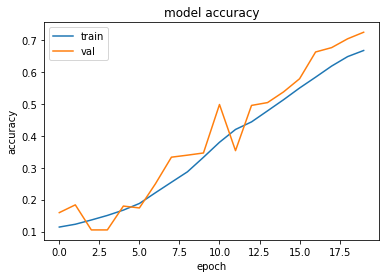

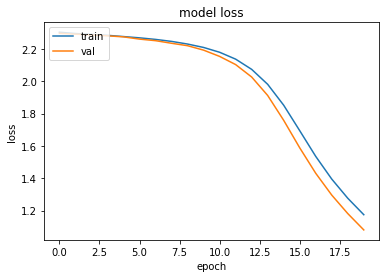

In [7]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.6962


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

labels_pred = model.predict_classes(x_test, verbose=0)

print(confusion_matrix(y_test, labels_pred))
print(classification_report(y_test, labels_pred))

[[ 920    0    1    5    0   32   21    0    1    0]
 [   0 1120    6    4    0    0    2    1    2    0]
 [  39   79  625   37   21   12  188    8   23    0]
 [  39   19   45  750    4   57    8   23   60    5]
 [   2   20    0    0  773    0   40   25    2  120]
 [ 166   20   21  184   24  326   54   27   40   30]
 [  40   20   29    6   19   10  833    0    1    0]
 [   2   70    6    0   28   11    3  802   15   91]
 [  69   68   68  191   46  103   36   33  328   32]
 [  15   15    0    5  273   17    8  184    7  485]]
             precision    recall  f1-score   support

          0       0.71      0.94      0.81       980
          1       0.78      0.99      0.87      1135
          2       0.78      0.61      0.68      1032
          3       0.63      0.74      0.68      1010
          4       0.65      0.79      0.71       982
          5       0.57      0.37      0.45       892
          6       0.70      0.87      0.77       958
          7       0.73      0.78      0.75  